In [76]:
import org.apache.spark.sql.types._
import org.apache.spark.sql.functions._

val productSchema = StructType(Array(
    StructField("ProductID", IntegerType),
    StructField("ProductNumber", StringType),
    StructField("ProductName", StringType),
    StructField("ModelName", StringType),
    StructField("MakeFlag", IntegerType),
    StructField("StandardCost", StringType),
    StructField("ListPrice", FloatType),
    StructField("SubCategoryID", IntegerType)))

val df = spark.read.format("csv").option("header","true").schema(productSchema).load("products.csv")
df.withColumn("ListPrice", col("ListPrice")+10)
df.printSchema()
df.show()

root
 |-- ProductID: integer (nullable = true)
 |-- ProductNumber: string (nullable = true)
 |-- ProductName: string (nullable = true)
 |-- ModelName: string (nullable = true)
 |-- MakeFlag: integer (nullable = true)
 |-- StandardCost: string (nullable = true)
 |-- ListPrice: float (nullable = true)
 |-- SubCategoryID: integer (nullable = true)

+---------+-------------+--------------------+--------------------+--------+------------+---------+-------------+
|ProductID|ProductNumber|         ProductName|           ModelName|MakeFlag|StandardCost|ListPrice|SubCategoryID|
+---------+-------------+--------------------+--------------------+--------+------------+---------+-------------+
|      680|   FR-R92B-58|HL Road Frame - B...|       HL Road Frame|       1|     1059.31|   1431.5|           14|
|      706|   FR-R92R-58|HL Road Frame - R...|       HL Road Frame|       1|     1059.31|   1431.5|           14|
|      707|    HL-U509-R|Sport-100 Helmet,...|           Sport-100|       0|     1

import org.apache.spark.sql.types._
import org.apache.spark.sql.functions._
productSchema: org.apache.spark.sql.types.StructType = StructType(StructField(ProductID,IntegerType,true), StructField(ProductNumber,StringType,true), StructField(ProductName,StringType,true), StructField(ModelName,StringType,true), StructField(MakeFlag,IntegerType,true), StructField(StandardCost,StringType,true), StructField(ListPrice,FloatType,true), StructField(SubCategoryID,IntegerType,true))
df: org.apache.spark.sql.DataFrame = [ProductID: int, ProductNumber: string ... 6 more fields]


In [77]:
df.createOrReplaceTempView("products")

In [78]:
%%python
from matplotlib import pyplot as plt

# Get the data as a Pandas dataframe
temp = spark.sql("SELECT ModelName, COUNT(ProductID) AS ProductCount FROM products \
                  GROUP BY ModelName \
                  ORDER BY ModelName")

temp.createOrReplaceTempView("productcount")
data = spark.sql("SELECT ModelName, ProductCount FROM productcount \
                  WHERE ProductCount > 1").toPandas()

<IPython.core.display.Javascript object>


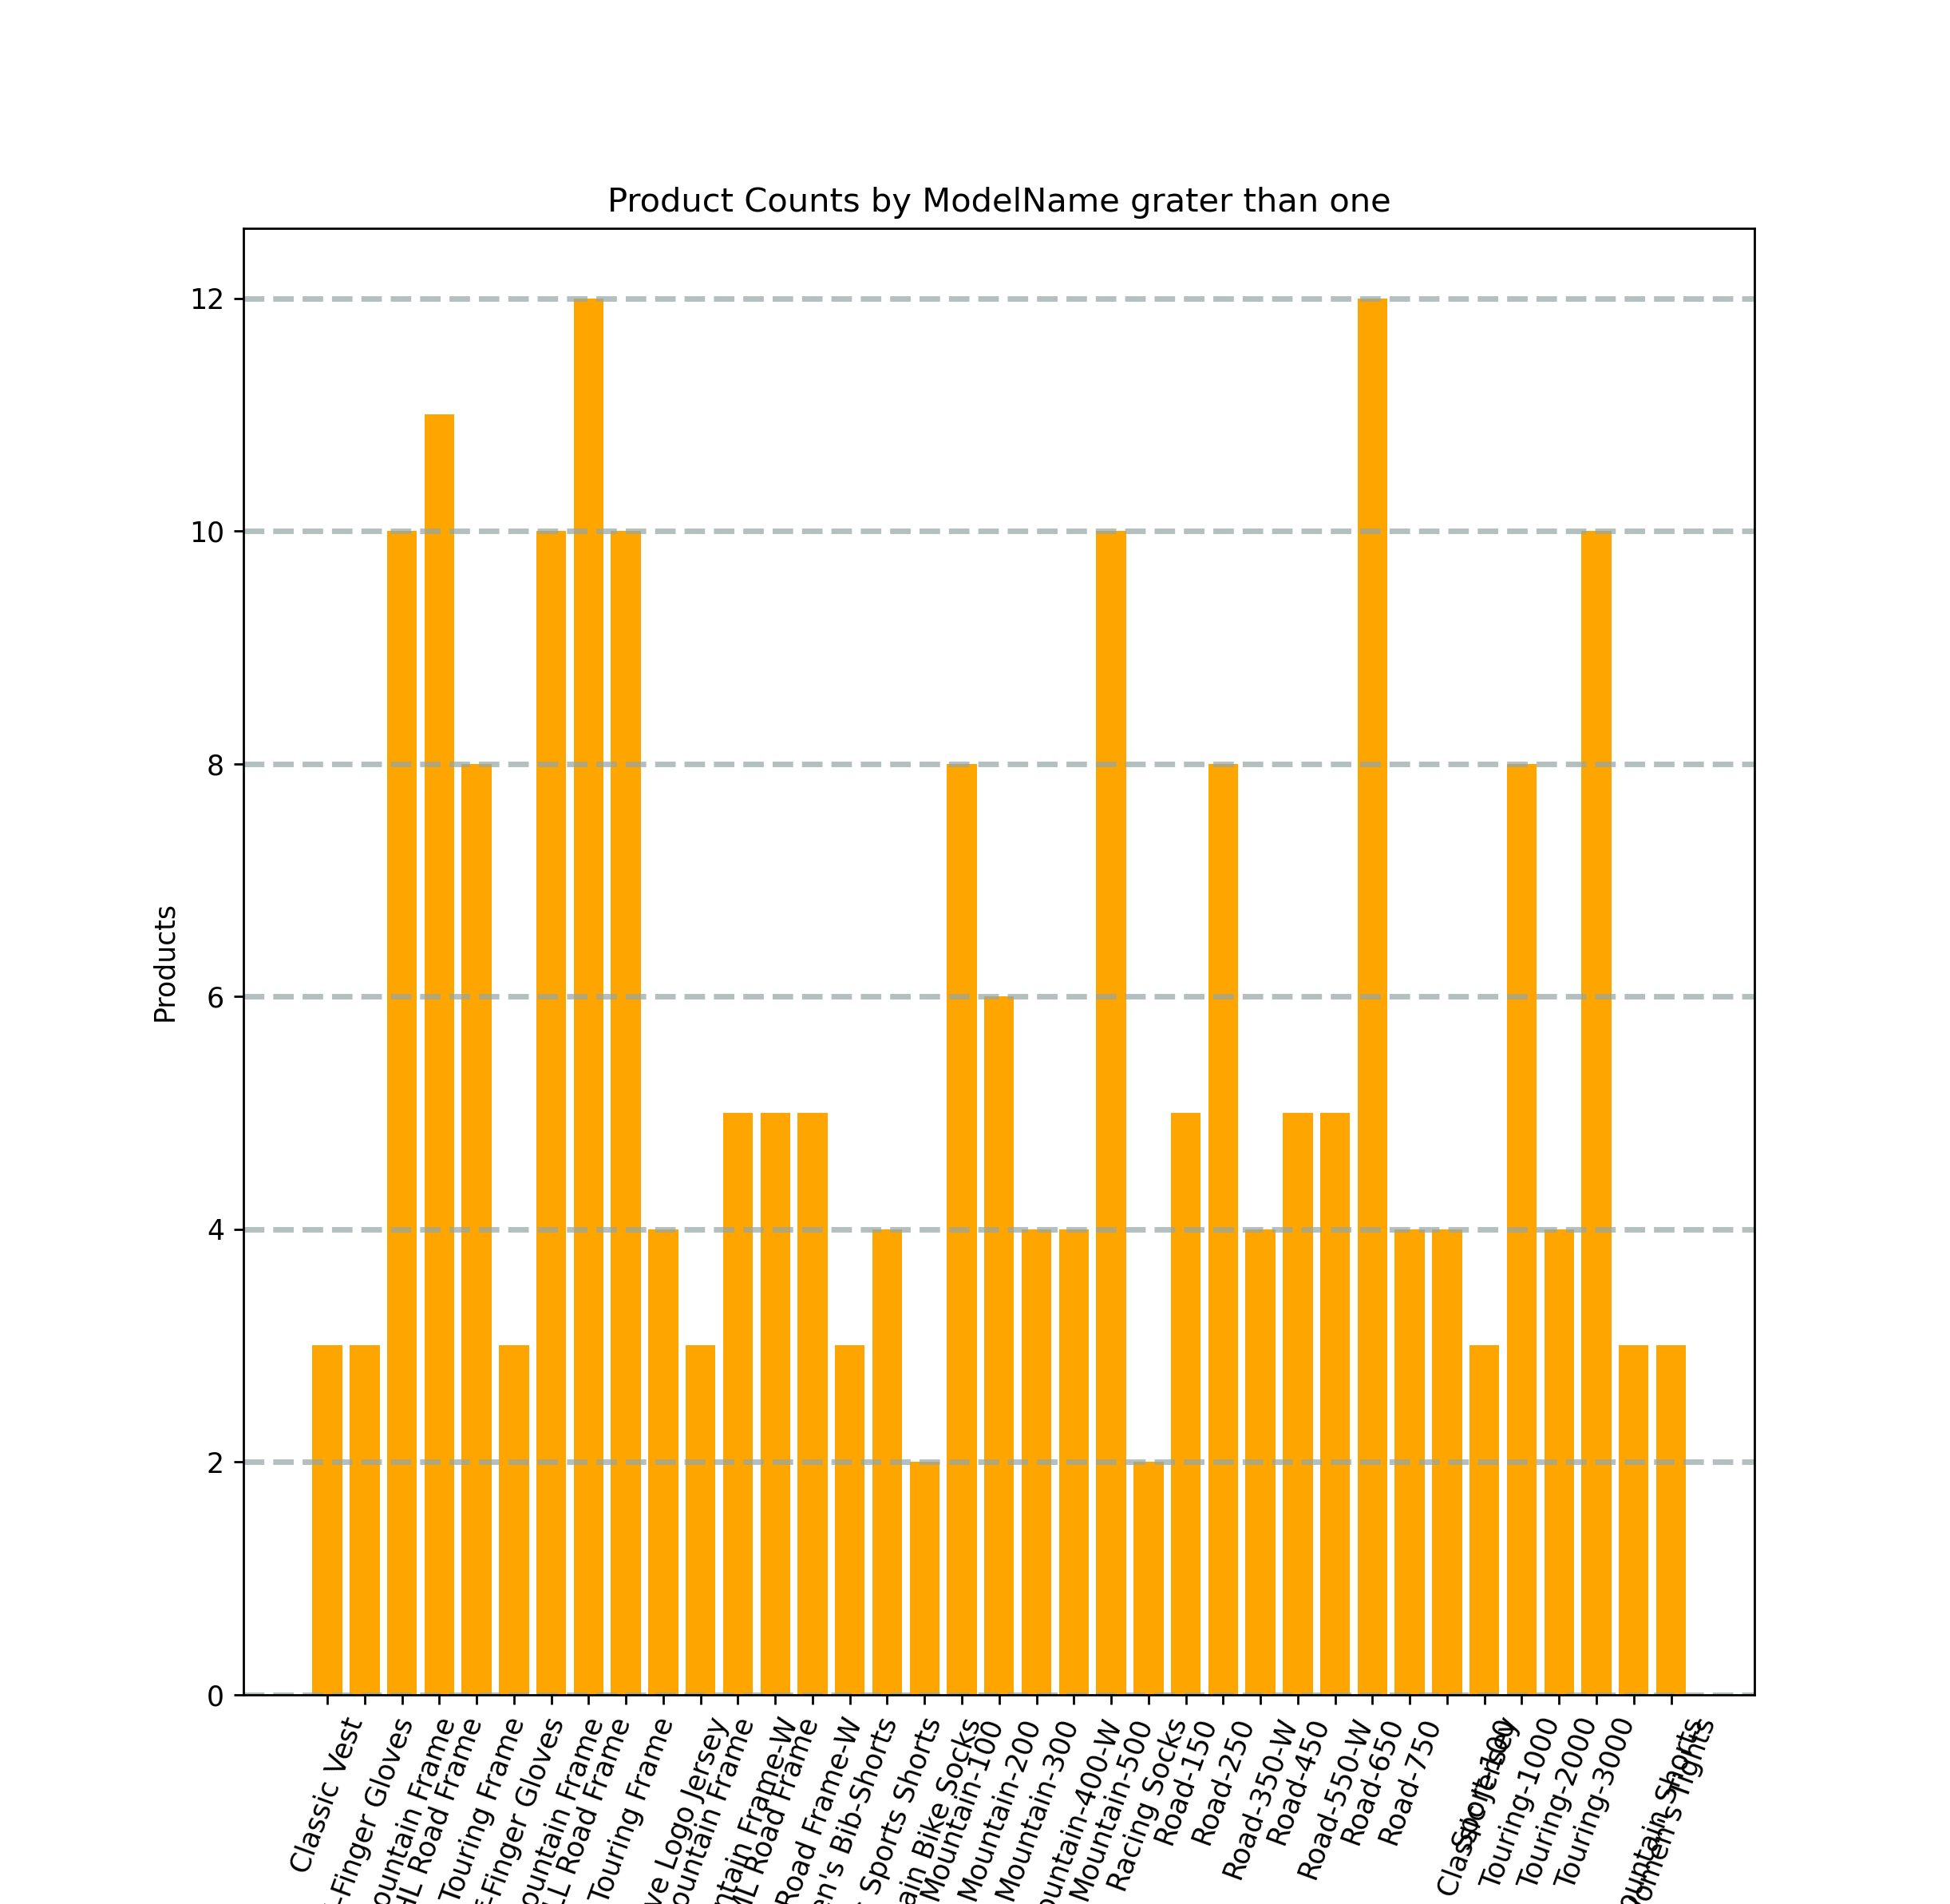

In [79]:
%matplotlib notebook
%%python

# Clear the plot area
# plt.clf()

# Create a Figure
fig = plt.figure(figsize=(12,8))

# Create a bar plot of product counts by ModelName
plt.bar(x=data['ModelName'], height=data['ProductCount'], color='orange')

# Customize the chart
plt.title('Product Counts by ModelName grater than one')
plt.xlabel('ModelName')
plt.ylabel('Products')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=70)

# Show the plot area
plt.show()